# sklearn

可以看到库的算法主要有四类：分类，回归，聚类，降维。其中：

- 常用的回归：线性、决策树、SVM、KNN ；集成回归：随机森林、Adaboost、GradientBoosting、Bagging、ExtraTrees
- 常用的分类：线性、决策树、SVM、KNN，朴素贝叶斯；集成分类：随机森林、Adaboost、GradientBoosting、Bagging、ExtraTrees
- 常用聚类：k均值（K-means）、层次聚类（Hierarchical clustering）、DBSCAN
- 常用降维：LinearDiscriminantAnalysis、PCA


# 数据预处理preprocessing

## 标准化
- 在机器学习算法的目标函数(例如SVM的RBF内核或线性模型的l1和l2正则化)，许多学习算法中目标函数的基础都是假设所有的特征都是零均值并且具有同一阶数上的方差。如果某个特征的方差比其他特征大几个数量级，那么它就会在学习算法中占据主导位置，导致学习器并不能像我们说期望的那样，从其他特征中学习。

sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)

In [10]:
import numpy as np
from  sklearn.preprocessing import StandardScaler
X_train = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
scaler = StandardScaler()
print(scaler.fit(X_train))
#================返回值提取
print(scaler.mean_)
print(scaler.transform(X_train))


StandardScaler(copy=True, with_mean=True, with_std=True)
[1.         0.         0.33333333]
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


## 生成多项式特征
-通常，考虑输入数据的非线性特征会增加模型的复杂性。多项式特征是一种简单而通用的方法，它可以获取特征的高阶和相互作用项。它在PolynomialFeatures以下位置实现：

 sklearn.preprocessing.PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')

In [11]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)

poly = PolynomialFeatures(2)
poly.fit_transform(X)

poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)


array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

## 数据非线性变换

-  PowerTransformer 目前提供两个这样的幂变换,Yeo-Johnson transform 和 the Box-Cox transform。
- sklearn.preprocessing.PowerTransformer（method = 'yeo-johnson'，*，standardize = True，copy = True）

In [15]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='box-cox', standardize=False)
X_lognormal = np.random.RandomState(616).lognormal(size=(3, 3))
pt.fit_transform(X_lognormal)
#使用Box-Cox将样本从对数正态分布映射到正态分布

array([[ 0.49024349,  0.17881995, -0.1563781 ],
       [-0.05102892,  0.58863195, -0.57612414],
       [ 0.69420009, -0.84857822,  0.10051454]])

# 回归分析

-https://scikit-learn.org/stable/
- 中文介绍 https://www.cntofu.com/book/170/readme.html

## 线性回归分析

$$ \hat{y}(w,x)= w_{0} + w_{1} x_{1} +\ldots+ w_{p} x_{p} $$

In [126]:
from sklearn import linear_model
# 线性模型： 最小二乘法、岭回归、Lasso（梯度下降）、弹性网、最小角回归、正交匹配追踪
# 广义线性模型           #逻辑回归
#随机梯度下降           #感知器
#稳健回归             #多项式回归

import pandas as pd

1. **普通最小二乘法（Ordinary least squares）：**

以模型预测值与样本观测值的残差平方和最小作为优化目标。

2. **岭回归（Ridge regression）** 

在普通最小二乘法的基础上增加惩罚因子以减少共线性的影响，以带惩罚项（L2正则化）的残差平方和最小作为优化目标。在指标中同时考虑了较好的学习能力以及较小的惯性能量，以避免过拟合而导致模型泛化能力差。

3. **Lasso 回归（Least absolute shrinkage and selection operator）**

在普通最小二乘法的基础上增加绝对值偏差作为惩罚项（L1正则化）以减少共线性的影响，在拟合广义线性模型的同时进行变量筛选和复杂度调整，适用于稀疏系数模型。

4. **多元 Lasso 回归（Multi-task Lasso）**

用于估计多元回归稀疏系数的线性模型。注意不是指多线程或多任务，而是指对多个输出变量筛选出相同的特征变量（也即回归系数整列为 0，因此该列对应的输入变量可以被删除）。

5. **弹性网络回归（Elastic-Net）**

引入L1和L2范数正则化而构成带有两种惩罚项的模型，相当于岭回归和 Lasso 回归的组合。

6. **Multi-task Elastic-Net**

用于估计多元回归稀疏系数线性模型的弹性网络回归方法。

7. **最小角回归算法（Least Angle Regression）**

结合前向梯度算法和前向选择算法，在保留前向梯度算法的精确性的同时简化迭代过程。每次选择都加入一个与相关度最高的自变量，最多 m步就可以完成求解。特别适合于特征维度远高于样本数的情况。

8. **LARS Lasso** 使用最小角回归算法求解 Lasso模型。

9. **正交匹配追踪法（Orthogonal Matching Pursuit）**

用于具有非零系数变量数约束的近似线性模型。在分解的每一步进行正交化处理，选择删除与当前残差最大相关的列，反复迭代达到所需的稀疏程度。

10. **贝叶斯回归（Bayesian Regression）**

用贝叶斯推断方法求解的线性回归模型，具有贝叶斯统计模型的基本性质，可以求解权重系数的概率密度函数。可以被用于观测数据较少但要求提供后验分布的问题，例如对物理常数的精确估计；也可以用于变量筛选和降维。

11. **逻辑回归（Logistic Regression）**
逻辑回归是一种广义线性模型，研究顺序变量或属性变量作为输出的问题，实际是一种分类方法。通过线性模型加Sigmoid映射函数，将线性模型连续型输出变换为离散值。常用于估计某种事物的可能性，如寻找危险因素、预测发病概率、判断患病概率，是流行病学和医学中最常用的分析方法。
12. **广义线性回归（Generalized Linear Regression）**
广义线性回归是线性回归模型的推广，实际上是非线性模型。通过单调可微的联结函数，建立输出变量与输入变量的线性关系，将问题简洁直接地转化为线性模型来处理。
13. **随机梯度下降（Stochastic Gradient Descent）**
梯度下降是一种基于搜索的最优化方法，用梯度下降法来求损失函数最小时的参数估计值，适用样本数（和特征数）非常非常大的情况。随机梯度下降法在计算下降方向时，随机选一个数据进行计算，而不是扫描全部训练数据集，加快了迭代速度。
14. **感知机（Perceptron）感知机（Perceptron）** 感知机是一种适合大规模学习的简单分类算法。训练速度比SGD稍快，并且产生的模型更稀疏。
15. **被动攻击算法（Passive Aggressive Algorithms）**
被动攻击算法是一类用于大规模学习的算法。
16. **鲁棒性回归（Robustness regression）**

鲁棒性回归的目的是在存在损坏数据的情况下拟合回归模型，如存在异常值或错误的情况。
17. **多项式回归（Polynomial regression）**
多项式回归通过构造特征变量的多项式来扩展简单的线性回归模型。例如将特征变量组合成二阶多项式，可以将抛物面拟合到数据中，从而具有更广泛的灵活性和适应性。

## 加载数据集

### 导入sklearn 模块内的数据

In [80]:
import sklearn
from sklearn.datasets import load_boston
#装载数据集
boston = load_boston()

#显示元信息
print (boston.keys())
print('*-*'*30)
print (boston.feature_names)
print('*-*'*30)
#print (boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [81]:
#方法一:以数据原来的格式--数组的形式
X = boston.data
y = boston.target
print(type(X),type(y))

# 方法二：
Bos_X, Bos_y = sklearn.datasets.load_boston(return_X_y=True)


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [82]:
#方法三：以数据框的形式
#创建DataFrame
bos = pd.DataFrame(boston.data)#特征
#print (bos.head())
print('='*30,'设定各个属性列的名称','='*30)

bos.columns = boston.feature_names
#print (bos.head())

print('='*30,'增加价格PRICE列','='*30)
#print (boston.target[:5])
bos['PRICE'] = boston.target
#print (bos.head())
print('='*40,'数据信息')
bos.info()
#bos.isnull().sum()

============================== 设定各个属性列的名称 ==============================
============================== 增加价格PRICE列 ==============================
======================================== 数据信息
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [105]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [109]:
corrboston = bos.corr()
#corrboston
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()    #设置画图空间为 Seaborn 默认风格
plt.figure(figsize=(10,10))    #设置画布
#sns.heatmap(corrboston,annot=True,cmap='RdGy')
plt.show()

<Figure size 720x720 with 0 Axes>

In [145]:
names=list(boston.feature_names)
x_data = bos[names] # 导入所有特征变量
y_data = bos['PRICE'] # 导入目标值（房价）


### 数据划分

In [146]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split ( x_data, y_data, test_size=0.33, random_state=5) 
# 划分对象可以是lists, numpy arrays, scipy-sparsematrices or pandas dataframes
# 更多内容参见 help(train_test_split)
print (X_train.shape )
print (X_test.shape )
print (Y_train.shape )
print (Y_test.shape )


(339, 13)
(167, 13)
(339,)
(167,)


names =a
plt.figure(figsize=(18,10))

for i in range(13):
    plt.subplot(4,4,i+1)
    plt.scatter(x_data.values[:,i],y_data,s = 5)    #.values将DataFrame对象X_df转成ndarray数组
    plt.xlabel(names[i])
    plt.ylabel('Price')
    plt.title(str(i+1)+'. '+names[i]+' - Price')  
#plt.title('每个变量与房价的散点图')    
plt.tight_layout()

plt.show()

## 普通最小二乘法--sklearn

### 拟合模型

实现的语句：
LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)

- fit_intercept设置为False时，将忽略此参数。如果为True，则将在回归之前通过减去均值并除以l2-范数来对回归变量X进行归一化。

LinearRegression() 类的参数不多，通常几乎不需要设置。
　
LinearRegression() 类的主要方法：

- fit(X,y[,sample_weight])　　用样本集（X, y）训练模型。sample_weight 为每个样本设权重，默认None。
- get_params([deep])　　获取模型参数。注意不是指模型回归系数，而是指fit_intercept,normalize等参数。
- predict(X)　　用训练的模型预测数据集 X 的输出。即可以对训练样本给出模型输出结果，也可以对测试样本给出预测结果。
- score(X,y[,sample_weight])　　R2 判定系数，是常用的模型评价指标。

In [176]:
from sklearn import linear_model
#建立线性回归模型，并将变量带入模型进行训练。
regr = linear_model.LinearRegression()

model = regr.fit( X_train, Y_train)

print('回归截距项:',model.intercept_)

print('回归系数:',model.coef_)

#显示各个变量的系数
coef = pd.DataFrame( zip(boston.feature_names, model.coef_), columns=['features', 'OLS estimated coefficients'])
print(coef)


回归截距项: 32.8589326340861
回归系数: [-1.56381297e-01  3.85490972e-02 -2.50629921e-02  7.86439684e-01
 -1.29469121e+01  4.00268857e+00 -1.16023395e-02 -1.36828811e+00
  3.41756915e-01 -1.35148823e-02 -9.88866034e-01  1.20588215e-02
 -4.72644280e-01]
   features  Linear model estimated coefficients
0      CRIM                            -0.156381
1        ZN                             0.038549
2     INDUS                            -0.025063
3      CHAS                             0.786440
4       NOX                           -12.946912
5        RM                             4.002689
6       AGE                            -0.011602
7       DIS                            -1.368288
8       RAD                             0.341757
9       TAX                            -0.013515
10  PTRATIO                            -0.988866
11        B                             0.012059
12    LSTAT                            -0.472644


### 模型评估

In [166]:
from sklearn.metrics import r2_score
y_pred =regr.predict(X_train)
score = r2_score(Y_train, y_pred)
print('训练集的可决系数：%.4f'%score)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train, y_pred)
print('训练集的均方误差：%.4f'%mse)

from sklearn.metrics import mean_absolute_error
print('训练集的平均绝对值误差：{:.4f}'.format(mean_absolute_error(Y_train, y_pred)))  # MAE 平均绝对误差
from sklearn.metrics import median_absolute_error
print('训练集的中位绝对值误差：{:.4f}'.format(median_absolute_error(Y_train, y_pred)))  # 中值绝对误差

训练集的可决系数：0.7551
训练集的均方误差：19.5468
训练集的平均绝对值误差：3.1219
训练集的中位绝对值误差：2.3422


 **scikit-learn.metrics里各种指标简介**

1. 简单介绍参见：https://www.cnblogs.com/mdevelopment/p/9456486.html

2. 详细介绍参见：https://www.cnblogs.com/harvey888/p/6964741.html

3. 官网介绍：https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

### 绘制图像

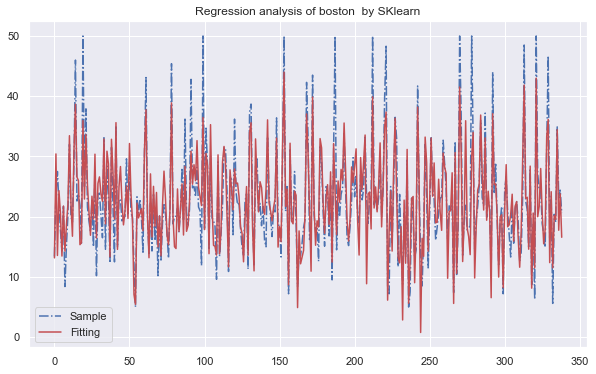

In [171]:

# 绘图：原始数据点，拟合曲线
fig, ax = plt.subplots(figsize=(10, 6))  # YouCans, XUPT
ax.plot(range(len(Y_train)), Y_train, 'b-.', label='Sample')  # 样本数据
ax.plot(range(len(Y_train)), y_pred, 'r-', label='Fitting')  # 拟合数据
ax.legend(loc='best')  # 显示图例
plt.title('Regression analysis of boston  by SKlearn')
#plt.xlabel('period')
#plt.ylabel('sales')
plt.show()

## 普通最小二乘--Statsmodels

statsmodels主要包括如下子模块：

- 回归模型：线性回归，广义线性模型，稳健的线性模型，线性混合效应模型等等。

- 方差分析（ANOVA）。

- 时间序列分析：AR，ARMA，ARIMA，VAR和其它模型。

- 非参数方法： 核密度估计，核回归。

- 统计模型结果可视化。
**比较：statsmodels更关注统计推断，提供不确定估计和参数p-value。相反的，scikit-learn注重预测。**

In [229]:
import statsmodels.api as sm #横截面模型和方法
#https://www.statsmodels.org/stable/api.html

OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)

- endog、 exog: array 

In [231]:
from sklearn.model_selection import train_test_split
X = boston.data
y = boston.target

X_train, X_test, Y_train, Y_test =train_test_split (X, y, test_size=0.33) 
X_train=sm.add_constant(X_train)
model_s=sm.OLS(Y_train,X_train)
results = model_s.fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     68.53
Date:                Wed, 19 May 2021   Prob (F-statistic):           7.87e-85
Time:                        01:49:49   Log-Likelihood:                -1013.8
No. Observations:                 339   AIC:                             2056.
Df Residuals:                     325   BIC:                             2109.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.9010      6.182      7.101      0.0

In [250]:
from sklearn.metrics import r2_score
y_pred =results.predict(X_train)
score = r2_score(Y_train, y_pred)
print('训练集的可决系数：%.4f'%score)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train, y_pred)
print('训练集的均方误差：%.4f'%mse)

from sklearn.metrics import mean_absolute_error
print('训练集的平均绝对值误差：{:.4f}'.format(mean_absolute_error(Y_train, y_pred)))  # MAE 平均绝对误差
from sklearn.metrics import median_absolute_error
print('训练集的中位绝对值误差：{:.4f}'.format(median_absolute_error(Y_train, y_pred)))  # 中值绝对误差

训练集的可决系数：0.7327
训练集的均方误差：23.1732
训练集的平均绝对值误差：3.4139
训练集的中位绝对值误差：2.6438


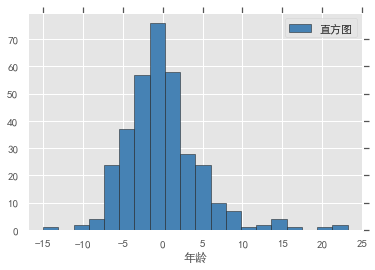

In [260]:
residual = results.resid
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei'# 用黑体显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False  #解决负号问题
plt.style.use( 'ggplot')

plt.hist(residual , bins = 20, color = 'steelblue', edgecolor = 'k',label = '直方图')
         # 绘图数据# 指定直方图的条形数为20个
         # 指定填充色 # 指定直方图的边界色 # 为直方图呈现标签
# 去除图形顶部边界和右边界的刻度
plt.tick_params(top= 'off', right= 'off')
# 显示图例
plt.legend()
# 显示图形
plt.xlabel("年龄") 
plt.show()

In [248]:
#、一般情况下，科学研究会建议VIF=10设置为threshold，任何变量的VIF>10,会被认为需
#要重新检视该变量,可能存在多重共线性
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF= []
for i in range(X_train.shape[1]):
    VIF.append(variance_inflation_factor(exog=X_train,exog_idx=i))
print(VIF)

name1= list(boston.feature_names)
name1=['const']+name1
pd.DataFrame({'coef_name':name1,'VIF':np.round(VIF,3)})


[536.065574409438, 1.7228520755029013, 2.1963002172956156, 3.9339125495676006, 1.148262541468531, 4.231721232142396, 1.7820102520016192, 3.0588201969630613, 3.733431175770859, 7.728848661331716, 9.558848316852998, 1.8388693184173543, 1.473718149984518, 2.693406801085234]


,coef_name,VIF
0,const,536.066
1,CRIM,1.723
2,ZN,2.196
3,INDUS,3.934
4,CHAS,1.148
5,NOX,4.232
6,RM,1.782
7,AGE,3.059
8,DIS,3.733
9,RAD,7.729


## 岭回归

Ridge（alpha = 1.0，*，fit_intercept = True，normalize = False，copy_X = True，max_iter = None，tol = 0.001，solver= 'auto'，random_state = None）

 目标函数 ||y - Xw||^2_2 + alpha * ||w||^2_2


In [179]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
model1=clf.fit(X_train, Y_train)
#显示各个变量的系数
coef1 = pd.DataFrame( zip(boston.feature_names, model1.coef_), columns=['features', 'Ridge estimated coefficients'])
print(coef1)

   features  Ridge estimated coefficients
0      CRIM                     -0.152847
1        ZN                      0.039770
2     INDUS                     -0.051566
3      CHAS                      0.634287
4       NOX                     -6.357149
5        RM                      4.009259
6       AGE                     -0.017092
7       DIS                     -1.272979
8       RAD                      0.327888
9       TAX                     -0.014335
10  PTRATIO                     -0.920537
11        B                      0.011868
12    LSTAT                     -0.484499


In [33]:
print('CV 方法选择调节参数')
plt.rcParams['font.family']='SimHei'# 用黑体显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False  #解决负号问题

alphas = 10**np.linspace(-3,3,100)

ridge_cofficients = []

for alpha in alphas:
    ridge = Ridge(alpha = alpha, normalize=True)
    ridge.fit(X_train, Y_train)
    ridge_cofficients.append(ridge.coef_)
#print(ridge_cofficients)
p1 = plt.figure(figsize=(10,8),dpi=100)## 确定画布大小
ax = plt.subplot(1,1,1)

ax.plot(alphas, ridge_cofficients)
ax.set_xscale('log')
#ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

CV 方法选择调节参数


NameError: name 'Ridge' is not defined

In [303]:
#为了找到最佳的lambda值,我们采用交叉验证方法
#岭回归模型的交叉验
alphas = list(10**np.linspace(-3,3,100))
from sklearn.linear_model import RidgeCV
#ridge_cv= RidgeCV(alphas = alphas, normalize=True, scoring='mean-squared_error, cv = 10)

ridgecv=RidgeCV(alphas=alphas,cv=5)
clf=ridgecv.fit(X_train,Y_train)
#取出最佳的lambda值ridge best alpha =ridge cv.alpha
ridge_best_alpha=ridgecv.alpha_
ridge_best_alpha

rcvb=Ridge(alpha=ridge_best_alpha)
clf1=rcvb.fit(X_train,Y_train)

In [306]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=ridge_best_alpha)
modelr=clf.fit(X_train, Y_train)
#显示各个变量的系数
coefr = pd.DataFrame( zip(boston.feature_names, model1.coef_), columns=['features', 'Ridge estimated coefficients+CV'])
print(coef1)

   features  Ridge estimated coefficients
0      CRIM                     -0.152847
1        ZN                      0.039770
2     INDUS                     -0.051566
3      CHAS                      0.634287
4       NOX                     -6.357149
5        RM                      4.009259
6       AGE                     -0.017092
7       DIS                     -1.272979
8       RAD                      0.327888
9       TAX                     -0.014335
10  PTRATIO                     -0.920537
11        B                      0.011868
12    LSTAT                     -0.484499


In [307]:
from sklearn.metrics import r2_score
y_pred =modelr.predict(X_train)
score = r2_score(Y_train, y_pred)
print('训练集的可决系数：%.4f'%score)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_train, y_pred)
print('训练集的均方误差：%.4f'%mse)

from sklearn.metrics import mean_absolute_error
print('训练集的平均绝对值误差：{:.4f}'.format(mean_absolute_error(Y_train, y_pred)))  # MAE 平均绝对误差
from sklearn.metrics import median_absolute_error
print('训练集的中位绝对值误差：{:.4f}'.format(median_absolute_error(Y_train, y_pred)))  # 中值绝对误差

训练集的可决系数：0.7327
训练集的均方误差：23.1762
训练集的平均绝对值误差：3.4077
训练集的中位绝对值误差：2.6174


In [ ]:
训练集的可决系数：0.7327
训练集的均方误差：23.1732
训练集的平均绝对值误差：3.4139
训练集的中位绝对值误差：2.6438

## Lasso

Lasso（alpha = 1.0，*，fit_intercept = True，normalize = False，precompute = False，copy_X = True，max_iter = 1000，tol = 0.0001，warm_start = False，正= False，random_state = None，selection='cyclic')

- (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1

In [26]:
from sklearn import linear_model

reg = linear_model.Lasso(alpha=0.1)
lasso_fit=reg.fit(X_train,Y_train)
lasso_fit.coef_
lasso_fit.score(X_train,Y_train)

0.7306693217097966

lasso_path(X, y, \*, eps=0.001, n_alphas=100, alphas=None, precompute='auto', Xy=None, copy_X=True, coef_init=None, verbose=False, return_n_iter=False, positive=False, \**params)

Computing regularization path using the lasso...


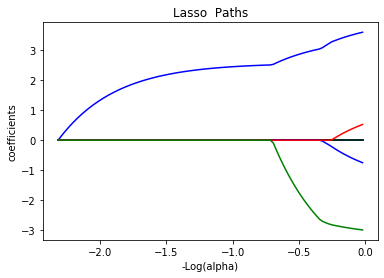

In [18]:
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import lasso_path
import sklearn
from sklearn.datasets import load_boston
#装载数据集
boston = load_boston()

#方法一:以数据原来的格式--数组的形式
X = boston.data
y = boston.target
X /= X.std(axis=0)  # Standardize data (easier to set the l1_ratio parameter)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split ( X, y, test_size=0.33) 

# Compute paths

eps = 5e-3  # the smaller it is the longer is the path

print("Computing regularization path using the lasso...")
alphas_lasso, coefs_lasso, _ = lasso_path(X, y, eps=eps, fit_intercept=False)


# Display results

plt.figure(1)
colors = cycle(['b', 'r', 'g', 'c', 'k'])
neg_log_alphas_lasso =  -np.log10(alphas_lasso)

for coef_l, c in zip(coefs_lasso, colors):
    l1 = plt.plot(neg_log_alphas_lasso, coef_l, c=c)
    

plt.xlabel('-Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso  Paths')
#plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
plt.axis('tight')


plt.show()

In [22]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0).fit(X_train,Y_train)
reg.score(X, y)

0.7374345293226132

# 逻辑回归

## sklearn

\ min_ {w，c} \ frac {1} {2} w ^ T w + C \ sum_ {i = 1} ^ n \ log（\ exp（-y_i（X_i ^ T w + c））+ 1） 

LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

In [78]:
import pandas as pd

train=pd.read_csv('E:/Data/Titanic/train.csv',encoding='GBK')
test=pd.read_csv('E:/Data/Titanic/test.csv',encoding='GBK')
full=pd.concat([train,test],ignore_index=True)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [79]:
import statsmodels.api as sm

In [80]:

mid = train['Age'].median()
age = train['Age'].fillna(mid)
age_test = test['Age'].fillna(mid)
train['Age'] = age
test['Age'] = age_test


In [81]:
ismale = (train['Sex'] == 'male').astype(int)
ismale_test = (test['Sex'] == 'male').astype(int)
train['ismale'] = ismale
test['ismale'] = ismale_test
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ismale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### 训练数据

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier


pick = ['Pclass', 'Age', 'ismale']
#从前面的数据分析看来，“Pclass”、“Age”、“ismale”这三个属性与是否幸存关系比较密切，因此选取这三列数作为自变量建模
model = LogisticRegression()#创建逻辑回归模型类
x_train=train[pick].values
y_train=train.Survived
x_train=sm.add_constant(x_train,prepend=False)
#X_train.info
model.fit(x_train, y_train)#训练数据

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
b=model.coef_
a=model.intercept_

In [38]:
y_predict = model.predict(x_train)
(y_predict == y_train).mean()

0.7878787878787878

### 模型评价-混淆矩阵

In [83]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_predict_log=model.predict(x_train)
from sklearn.metrics import classification_report
print(classification_report(y_train,y_predict_log))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83       549
           1       0.72      0.73      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



In [84]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_train,y_predict_log)
cnf_matrix


array([[454,  95],
       [ 94, 248]], dtype=int64)

### ROC曲线

In [85]:
decision_scores = model.decision_function(x_train)
#print(decision_scores)

from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_train,decision_scores)
#Returns
#precision ndarray of shape (n_thresholds + 1,)Precision values such that element i is the precision of predictions with score >= thresholds[i] and the last element is 1.

#recall ndarray of shape (n_thresholds + 1,)Decreasing recall values such that element i is the recall of predictions with score >= thresholds[i] and the last element is 0.

#thresholds ndarray of shape (n_thresholds,)

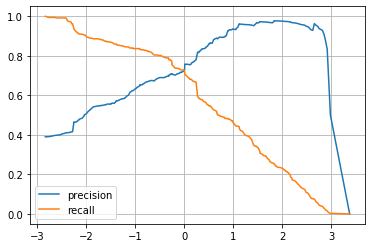

In [20]:
import matplotlib.pyplot as plt
plt.plot(thresholds,precisions[:-1],label='precision')
plt.plot(thresholds,recalls[:-1],label='recall')
plt.legend()
plt.grid()
plt.show() 

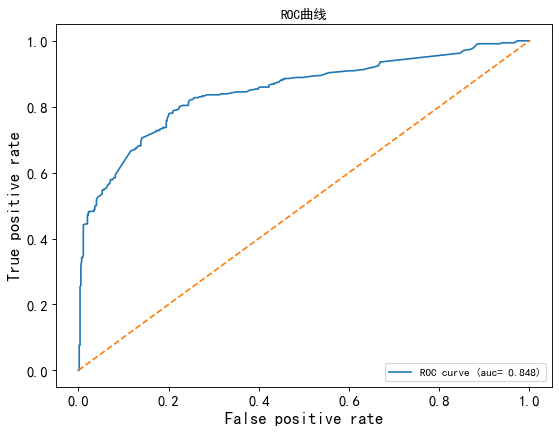

In [42]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.rcParams['font.family']='SimHei'# 用黑体显示中文
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False  #解决负号问题

fprs,tprs,thresholds = roc_curve(y_train,decision_scores)
from sklearn.metrics import auc
roc_auc=auc(fprs, tprs)
#def plot_roc_curve(fprs,tprs):
plt.figure(figsize=(8,6),dpi=80)
plt.plot(fprs,tprs,label='ROC curve (auc= %0.3f)' % roc_auc)
plt.plot([0,1],linestyle='--')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('True positive rate',fontsize=15)
plt.xlabel('False positive rate',fontsize=15)
plt.title("ROC曲线")
plt.legend(loc="lower right")
plt.show()
    
#plot_roc_curve(fprs,tprs)
#''ROC curve of %s, (AUC =%.4f)'' % ('Logistic',auc)

## statsmodels

In [43]:
import statsmodels.api as sm #横截面模型和方法
glm=sm.GLM(y_train,x_train,family=sm.families.Binomial())
res=glm.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      887
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -402.79
Date:                Fri, 21 May 2021   Deviance:                       805.59
Time:                        01:13:34   Pearson chi2:                     929.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1717      0.119     -9.820      0.0

# 决策树

## 分类树


- DecisionTreeClassifier 是一个能够对数据集执行多类分类的类
- DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

|参数| 参数的含义|
|--|--|
|criterion|{“gini”, “entropy”}, default=”gini”|
|splitter|{“best”, “random”}, default=”best”|
|max_depth|int, default=None|
|min_samples_split|int or float, default=2|
|min_samples_leaf|int or float, default=1|
|criterion|表示划分属性时选用的准则，可选，默认是“gini”，表示采用基尼系数；选择“entropy”，表示采用信息增益。|
|splitter|表示特征划分点选择策略，默认设置是“best”，在特征的所有划分点中找出最优的划分点；"random"是随机的在部分划分点中找局部最优的划分点。默认的"best"适合样本量不大的时候，而如果样本数据量非常大，此时决策树构建推荐"random" |
|max_depth|表示决策树的最大深度，可选，默认设置为None— 可以选择是int值或None，None时表示不限制决策树的深度，一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，即输入一个int值，具体的取值取决于数据的分布。常用的可以取值10-100之间。|
|min_samples_split|表示结点再划分所需最小样本数，可选，默认设置为2。— 可以选择int或者float，这个值限制了结点继续划分的条件，如果某结点的样本数少于min_samples_split，则不会继续再尝试选择最优特征来进行划分。 默认是2；如果样本量不大，不需要管这个值；如果样本量数量级非常大，则推荐增大这个值。|
|min_samples_leaf|表示叶结点所需的最少样本数，可选，默认值为1— 这个值限制了叶结点最少样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。 默认是1,可以输入最少的样本数的整数，或者最少样本数占样本总数的百分比。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。|
|min_weight_fraction_leaf|表示叶结点中所需的样本的权重和的最小值，默认为0.— 可为float型，这个值限制了叶结点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重问题。一般来说，如果我们有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时我们就要注意这个值了。|
|max_features|表示在进行划分时，可以考虑的最大的特征数，可选，默认为None— 可以选择int、float、auto、sqrt、log2、None。默认是"None",意味着划分时考虑所有的特征数；如果是"log2"意味着划分时最多考虑log2N个特征；如果是"sqrt"或者"auto"意味着划分时最多考虑N的二次方根个特征。如果是整数，代表考虑的特征绝对数。如果是浮点数，代表考虑特征百分比，即考虑（百分比xN）取整后的特征数。其中N为样本总特征数。一般来说，如果样本特征数不多，比如小于50，我们用默认的"None"就可以了，如果特征数非常多，我们可以灵活使用刚才描述的其他取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。|
|random_state|表示随机数的生成方法，可选，默认为None。— 可选int, RandomState instance或者None。如果是int，random_state是随机数发生器使用的种子; 如果RandomState实例，random_state是随机数生成器; 如果为None，则随机数生成器是np.random使用的RandomState实例。|
|max_leaf_nodes|表示最大叶结点数，可选，默认为None。— 通过限制最大叶子节点数，可以防止过拟合，默认是"None”，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。|
|min_impurity_decrease|表示结点减少的最小不纯度，也是一种阀值，可选，默认为0.0。— 可选float。意思，如果加权的不纯度减少量(基尼系数，信息增益，均方差，绝对差)超过阀值，则该结点将会被继续分割 。|
|min_impurity_split|表示结点划分的最小不纯度，也是一种阀值，默认为None。— 可选float。这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值，则该节点不再生成子节点。即为叶结点 。|
|class_weight|表示结点划分的最小不纯度，也是一种阀值，默认为None。— 可选dict, list of dicts, “balanced” or None；指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重，或者用“balanced”，如果使用“balanced”，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果你的样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的"None"。— 不适用于决策树回归。|
|presort|表示结点划分的最小不纯度，也是一种阀值，默认为False。— 可选Ture或False，一般来说，如果样本量少或者限制了一个深度很小的决策树，设置为true可以让划分点选择更加快，决策树建立的更加快。如果样本量太大的话，反而没有什么好处。问题是样本量少的时候，我速度本来就不慢。所以这个值一般懒得理它就可以了。|


### 数据信息

In [37]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
print (iris.keys())
print('*-*'*30)
print (iris.feature_names)
#print (iris.DESCR)
ir = pd.DataFrame(iris.data)#
ir.describe()
#ir.head()
feature_names=iris.feature_names

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [93]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_text
iris = load_iris()
X, y = iris.data, iris.target # 序列解包
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)
r = export_text(clf, feature_names=iris['feature_names'])#显示决策树的规则
print(r)


|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



<bound method DecisionTreeClassifier.predict_proba of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

[Text(223.2, 271.8, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(111.6, 163.08, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(334.79999999999995, 163.08, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(223.2, 54.360000000000014, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(446.4, 54.360000000000014, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

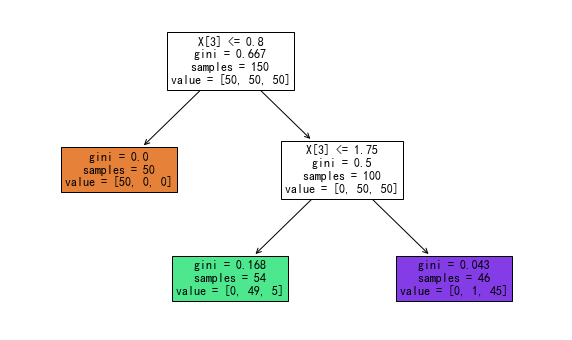

In [76]:
# 绘图：原始数据点，拟合曲线
fig= plt.figure(figsize=(10, 6))  # YouCans, XUPT
tree.plot_tree(clf,fontsize=12,filled=True) 

## 回归树

- DecisionTreeRegressor(*, criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, ccp_alpha=0.0)
- criterion，表示划分属性时选用的准则，可选，默认设置是“mse”表示采用均方差；选择“mae”，表示采用与均值之差的绝对值的和。推荐使用默认的"mse"。一般来说"mse"比"mae"更加精确。除非你想比较二个参数的效果的不同之处。

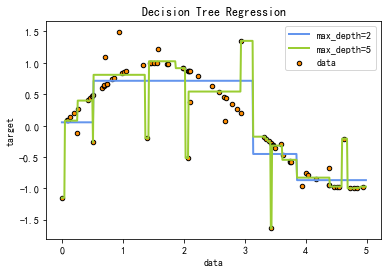

In [91]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)#设置种子
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# 集成学习

## Bagging
-  BaggingClassifier 和 BaggingRegressor

BaggingClassifier(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

BaggingRegressor(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

|参数|类型|参数说明|
|--|--|--|
|base_estimator：|object,default=None|适合于数据集的随机子集的基学习器。如果 None，则基学习器是决策树。|
|n_estimators：|int, default=10|训练基学习器（基学习器）的个数。|
|max_samples：|int or float, default=1.0|从X抽取的样本数，用于训练每个基学习器。如果为int，则抽取 max_samples 个样本。如果为float，则抽取 max_samples * X.shape[0] 个样本。|
|max_features：int or float, default=1.0|从X中提取的用于训练每个基本估计器的特征数。如果为int，则绘制 max_features 个特征。如果是float，则绘制特征 max_features * X.shape[1] 个特征。|
|bootstrap：|bool, default=True|是否为放回取样。如果为False，则执行不替换的样本。|
|bootstrap_features：|bool, default=False|是否针对特征随机取样。|
|oob_score：|bool, default=False|是否使用袋外样本估计泛化误差。（是否使用现成的样本来估计泛化误差。）|
|warm_start：|bool, default=False|当设置为True时，重用前面调用的解决方案来拟合并向集成添加更多的估计量，否则，只拟合一个全新的集成。|
|n_jobs：|int, default=None|使用几个处理起来运行；-1表示使用所有处理器。|
|random_state：|int or RandomState, default=None|控制原始数据集的随机重采样（采样和特征）。如果基估计器接受随机状态属性，则为集合中的每个实例生成不同的种子。为跨多个函数调用的可复制输出传递int。|
|verbose：|int, default=0|控制拟合和预测时的详细程度。|


In [137]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
dataset = load_iris()
X = dataset.data
y = dataset.target 
Xd_train, Xd_test, y_train, y_test = train_test_split(X, y, random_state=14)


In [138]:
clf = BaggingClassifier(n_estimators=500, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=1, random_state=1)
clf.fit(Xd_train, y_train)
predict_results=clf.predict(Xd_test)
print(accuracy_score(predict_results, y_test))
conf_mat = confusion_matrix(y_test, predict_results)
print(conf_mat)
print(classification_report(y_test, predict_results))

0.9736842105263158
[[17  0  0]
 [ 0 13  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      1.00      0.96        13
           2       1.00      0.88      0.93         8

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



## 随机森林

- 该sklearn.ensemble模块包括两种基于随机决策树的平均算法：RandomForest算法和Extra-Trees方法。
- RandomForestClassifier和 RandomForestRegressor分别实现分类和回归

RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

RandomForestRegressor(n_estimators=100, *, criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

- n_estimatorsint, default=100 表示决策树的数量

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
dataset = load_iris()
X = dataset.data
y = dataset.target 
Xd_train, Xd_test, y_train, y_test = train_test_split(X, y, random_state=14)
clf=RandomForestClassifier(n_estimators=2)
clf = clf.fit(Xd_train, y_train)
y_predicted = clf.predict(Xd_test)    
accuracy = np.mean(y_predicted == y_test) * 100
print ("y_test\n",y_test)
print ("y_predicted\n",y_predicted)
print ("accuracy:",accuracy)


y_test
 [0 0 0 1 2 1 0 1 0 1 2 0 2 2 0 1 0 2 2 1 0 0 0 1 0 2 0 1 1 0 0 1 1 0 1 0 2
 1]
y_predicted
 [0 0 0 1 1 1 0 1 0 1 1 0 2 2 0 1 0 2 2 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 2
 1]
accuracy: 92.10526315789474


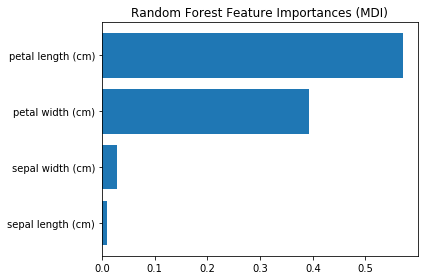

In [38]:
imp=clf.feature_importances_

tree_feature_importances = (imp)
sorted_idx = tree_feature_importances.argsort()
name=[feature_names[0],feature_names[1],feature_names[3],feature_names[2]]
y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_yticklabels(name)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()


plot_partial_dependence(estimator, X, features, *, feature_names=None, target=None, response_method='auto', n_cols=3, grid_resolution=100, percentiles=0.05, 0.95, method='auto', n_jobs=None, verbose=0, line_kw=None, contour_kw=None, ax=None, kind='average', subsample=1000, random_state=None)

In [49]:
from sklearn.inspection import plot_partial_dependence

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
dataset = load_iris()
X = dataset.data
y = dataset.target 
Xd_train, Xd_test, y_train, y_test = train_test_split(X, y, random_state=14)

clf=RandomForestClassifier(n_estimators=2)
clf = clf.fit(Xd_train, y_train)
feature_names=iris.feature_names
feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [51]:
#fig, ax = plt.subplots(figsize=(12, 6))
#ax.set_title("RandomForest")
#tree_disp = plot_partial_dependence(clf, Xd_train, ['sepal length (cm)','sepal width (cm)'], ax=ax)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)


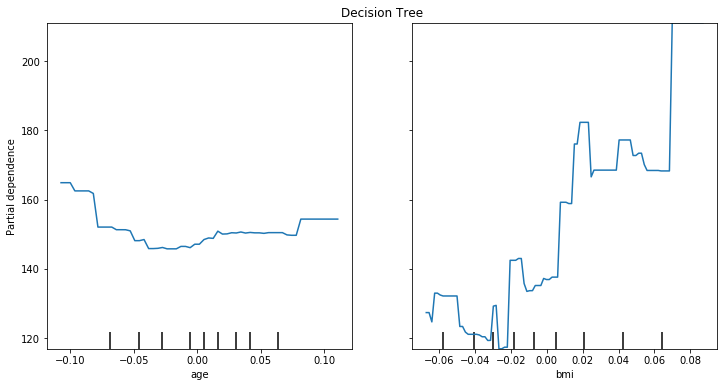

In [48]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import plot_partial_dependence
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

tree = DecisionTreeRegressor()

tree.fit(X, y)
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = plot_partial_dependence(tree, X, ["age", "bmi"], ax=ax)

## AdaBoost

1. AdaBoost可以用于分类和回归问题：

- 对于多类分类，AdaBoostClassifier实现AdaBoost-SAMME和AdaBoost-SAMME.R [ZZRH2009]。

- 对于回归，AdaBoostRegressor实现AdaBoost.R2 [D1997]。

- AdaBoostClassifier（base_estimator = None，*，n_estimators = 50，learning_rate = 1.0，algorithm = 'SAMME.R'，random_state = None）
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier
- 如果为None，则基学习器用 DecisionTreeRegressor初始化 max_depth=1。

- AdaBoostRegressor（base_estimator = None，*，n_estimators = 50，learning_rate = 1.0，loss = 'linear'，random_state = None）
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor
- 如果为None，则基学习器用 DecisionTreeRegressor初始化 max_depth=3。

In [17]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import tree
import sklearn.linear_model as LM
from sklearn import ensemble
from sklearn.datasets import make_classification,make_circles,make_regression
# 生成伪随机数
from sklearn.metrics import zero_one_loss,r2_score,mean_squared_error
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
X, Y = load_iris(return_X_y=True)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123)
dt_stump = tree.DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, Y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, Y_test)
dt = tree.DecisionTreeClassifier(max_depth=9, min_samples_leaf=1)
dt.fit(X_train, Y_train)
dt_err = 1.0 - dt.score(X_test, Y_test)

In [22]:
B=100
ada_discrete = ensemble.AdaBoostClassifier(base_estimator=dt_stump,n_estimators=B,algorithm="SAMME")
ada_discrete.fit(X_train, Y_train)
ada_real = ensemble.AdaBoostClassifier(base_estimator=dt_stump,n_estimators=B,algorithm="SAMME.R")
ada_real.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [23]:
ada_discrete_err = np.zeros((B,))
for i,Y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(Y_pred, Y_test)
ada_real_err = np.zeros((B,))
for i, Y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(Y_pred, Y_test)

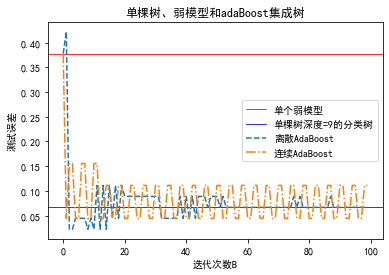

In [24]:
fig = plt.figure()
axes = fig.add_subplot(111)
axes.axhline(y=dt_stump_err,c='red',linewidth=0.8,label='单个弱模型')
axes.axhline(y=dt_err,c='blue',linewidth=0.8,label='单棵树深度=9的分类树')
axes.plot(np.arange(B), ada_discrete_err,linestyle='--',label='离散AdaBoost')
axes.plot(np.arange(B), ada_real_err,linestyle='-.',label='连续AdaBoost')
axes.set_xlabel('迭代次数B')
axes.set_ylabel('测试误差')
axes.set_title('单棵树、弱模型和adaBoost集成树')
axes.legend()
#leg = axes.legend(loc='upper right', fancybox=True)
#leg.get_frame().set_alpha(0.7)
plt.show()
#说明：对上述计算结果绘制折线图。图形显示弱模型的测试误差最高，
#复杂决策树的测试误差最低，但随迭代次数的增加，提升策略的测试误差不仅可以降复杂模型的水平，而且还会更低。

说明：利用模拟数据对比单棵决策树、弱模型以及提升策略的预测效果。
- 1、建立树深度等于1的弱模型，计算其测试误差。
- 2、建立树深度等于9的复杂决策树，计算其测试误差。
- 3、计算不断增加迭代次数至400过程中，计算以上述弱模型为基础学习器的提升策略中的SAMME和SAMME.R算法的测试误差。

## 梯度提升算法

In [ ]:
ensemble.GradientBoostingRegressor(*, loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', 
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, 
                                   min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, 
                                   max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, 
                                   validation_fraction=0.1,n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [ ]:
#本章需导入的模块
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn import tree
import sklearn.linear_model as LM
from sklearn import ensemble
from sklearn.datasets import make_classification,make_circles,make_regression
from sklearn.metrics import zero_one_loss,r2_score,mean_squared_error

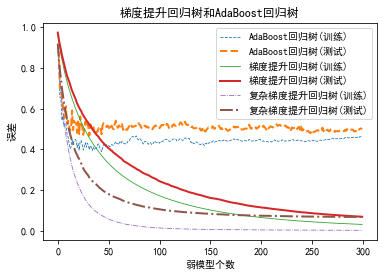

In [25]:
N=1000
X,Y=make_regression(n_samples=N,n_features=10,random_state=123)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123)

B=300
dt_stump = tree.DecisionTreeRegressor(max_depth=1, min_samples_leaf=1)
TrainErrAdaB=np.zeros((B,))
TestErrAdaB=np.zeros((B,))
adaBoost = ensemble.AdaBoostRegressor(base_estimator=dt_stump,n_estimators=B,loss= 'square',random_state=123)
adaBoost.fit(X_train,Y_train)
for b,Y_pred in enumerate(adaBoost.staged_predict(X_train)):
    TrainErrAdaB[b]=1-r2_score(Y_train,Y_pred) 
for b,Y_pred in enumerate(adaBoost.staged_predict(X_test)):
    TestErrAdaB[b]=1-r2_score(Y_test,Y_pred) 

GBRT=ensemble.GradientBoostingRegressor(loss='ls',n_estimators=B,max_depth=1,min_samples_leaf=1,random_state=123)
GBRT.fit(X_train,Y_train)
TrainErrGBRT=np.zeros((B,))
TestErrGBRT=np.zeros((B,))
for b,Y_pred in enumerate(GBRT.staged_predict(X_train)):
    TrainErrGBRT[b]=1-r2_score(Y_train,Y_pred)
for b,Y_pred in enumerate(GBRT.staged_predict(X_test)):
    TestErrGBRT[b]=1-r2_score(Y_test,Y_pred) 

GBRT0=ensemble.GradientBoostingRegressor(loss='ls',n_estimators=B,max_depth=3,min_samples_leaf=1,random_state=123)
GBRT0.fit(X_train,Y_train)
TrainErrGBRT0=np.zeros((B,))
TestErrGBRT0=np.zeros((B,))
for b,Y_pred in enumerate(GBRT0.staged_predict(X_train)):
    TrainErrGBRT0[b]=1-r2_score(Y_train,Y_pred) 
for b,Y_pred in enumerate(GBRT0.staged_predict(X_test)):
    TestErrGBRT0[b]=1-r2_score(Y_test,Y_pred) 

plt.plot(np.arange(B),TrainErrAdaB,linestyle='--',label="AdaBoost回归树(训练)",linewidth=0.8)
plt.plot(np.arange(B),TestErrAdaB,linestyle='--',label="AdaBoost回归树(测试)",linewidth=2)
plt.plot(np.arange(B),TrainErrGBRT,linestyle='-',label="梯度提升回归树(训练)",linewidth=0.8)
plt.plot(np.arange(B),TestErrGBRT,linestyle='-',label="梯度提升回归树(测试)",linewidth=2)
plt.plot(np.arange(B),TrainErrGBRT0,linestyle='-.',label="复杂梯度提升回归树(训练)",linewidth=0.8)
plt.plot(np.arange(B),TestErrGBRT0,linestyle='-.',label="复杂梯度提升回归树(测试)",linewidth=2)
plt.title("梯度提升回归树和AdaBoost回归树")
plt.xlabel("弱模型个数")
plt.ylabel("误差")
plt.legend()

说明：基于模拟数据对比梯度提升算法和提升策略回归树的预测性能。
- 1、利用make_regression生成样本量等于1000，包括10个数据变量，输出变量为数值型的数据集。利用旁置法划分训练集和测试集。
- 2、计算迭代次数增加至300过程中，提升策略回归树和梯度提升回归树的训练误差和测试误差。两者的集成学习器相同。
- 3、计算迭代次数增加至300过程中，基础学习器为较复杂模型下，提升策略回归树的训练误差和测试误差。
- 4、对计算结果绘制折线图。图形显示，梯度提升树的误差均低于提升策略回归树，同时，基础学习器较为复杂的梯度提升树，
能够在迭代次数较少时就获得较低的误差。

##  小节

1. **建立基于Bagging 的回归树和分类树**
  - Bag=ensemble.BaggingRegressor();Bag.fit(X,Y)
  - Bag=ensemble.BaggingClassifier();Bag.fit(X,Y)    
2. **建立基于随机森林的回归预测和分类预测**
  - RF=ensemble.RandomForestRegressor();RF.fit(X,Y)
  - RF=ensemble.RandomForestClassifier();RF.fit(X,Y) 
3. **建立基于提升策略的回归预测和分类预测**
  - Ada=ensemble.AdaBoostRegressor();Ada.fit(X,Y)
  - Ada=ensemble.AdaBoostClassifier();Ada.fit(X,Y) 
4. **建立梯度提升树的回归预测和分类预测**
  - Ada=ensemble.GradientBoostingRegressor();Ada.fit(X,Y)
  - Ada=ensemble.GradientBoostingClassifier();Ada.fit(X,Y) 
5. **生成用于分类预测的模拟数据**
  - X,Y=make_circles()
  - X,Y=make_classification()

# 支持向量机

svm.SVC(\*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

- 参数的含义参见 
 https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

svm.SVR(\*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1)

- 参数的含义 https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?highlight=svr#sklearn.svm.SVR

## 线性可分支持向量机

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False

from sklearn.datasets import make_classification,make_circles,make_regression
#生成模拟数据
from sklearn.model_selection import train_test_split
import sklearn.neural_network as net
import sklearn.linear_model as LM
from scipy.stats import multivariate_normal
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import svm


## 生成模拟数据

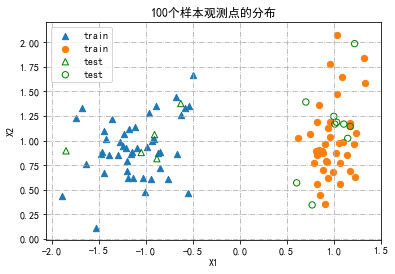

In [91]:
N=100
X,Y=make_classification(n_samples=N,n_features=2,n_redundant=0,n_informative=2,class_sep=1,random_state=1,n_clusters_per_class=1)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.85, random_state=123)
markers=['^','o']
for k,m in zip([1,0],markers):
    plt.scatter(X_train[Y_train==k,0],X_train[Y_train==k,1],marker=m,s=40,label='train')
for k,m in zip([1,0],markers):
    plt.scatter(X_test[Y_test==k,0],X_test[Y_test==k,1],marker=m,s=40,c='',edgecolors='g',label='test')
plt.title("100个样本观测点的分布")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True,linestyle='-.')
plt.legend()#loc="lower right", fancybox=True
plt.show()   

In [96]:
modelSVC=svm.SVC(kernel='linear',random_state=123,C=2,probability=True, decision_function_shape="ovr") #modelSVC=svm.LinearSVC(C=2,dual=False)
modelSVC.fit(X_train,Y_train)
print("超平面的常数项b：",modelSVC.intercept_)
print("超平面系数W：",modelSVC.coef_)
print("支持向量的个数：",modelSVC.n_support_)
print("支持向量\n",modelSVC.support_vectors_)
X1,X2= np.meshgrid(np.linspace(X_train[:,0].min(),X_train[:,0].max(),500),np.linspace(X_train[:,1].min(),X_train[:,1].max(),500))
X0=np.hstack((X1.reshape(len(X1)*len(X2),1),X2.reshape(len(X1)*len(X2),1)))
Y0=modelSVC.predict(X0)
Y0

超平面的常数项b： [0.00427528]
超平面系数W： [[-1.75478826  0.07731007]]
支持向量的个数： [1 2]
支持向量
 [[ 0.61771419  1.02817479]
 [-0.493857    1.66752297]
 [-0.54706224  0.46739791]]


array([1, 1, 1, ..., 0, 0, 0])

## ROC 曲线的另一种使用

roc_curve(y_true, y_score, \ *, pos_label=None, sample_weight=None, drop_intermediate=True)

- **y_score ndarray of shape (n_samples,)**


Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of decisions (as returned by “decision_function” on some classifiers).

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc#sklearn.metrics.roc_curve

In [112]:
#from sklearn.metrics import confusion_matrix
# 计算样本距离每个分类边界的距离
# One-vs-One 对3个类别来说，按照decision_function的得分[01, 02, 03, 12, 13, 23],前面的数字表示正类，后面的表示负类。
#判断每个分类器的分类结果，然后进行投票
# 负号表示负类
# One-vs-Rest 选择decision_function的得分[0-Rest, 1-Rest, 2-Rest, 3-Rest]最大的作为分类结果
print('decision_function:\n', modelSVC.decision_function(X_train))
# precidt预测样本对应的标签类别
print('predict:\n', modelSVC.predict(X_train))
# predict_proba 预测样本对应各个类别的概率
#print('predict_proba:\n',modelSVC.predict_proba(X_train)) #这个是得分,每个分类器的得分，取最大得分对应的类。
print('classes_:', modelSVC.classes_)
type(modelSVC.predict_proba(X_train))

decision_function:
 [-1.81039277  1.24997236 -2.09450869 -1.49000751  2.61913423  1.81964227
  1.70971191  1.38615851  1.56395095  2.32403675  2.20395055  2.08611658
  0.99980605  1.66929647  2.25194857 -2.20656346 -1.96626451 -1.54180729
  1.12283754  2.94386678  1.19597648 -1.23192199  2.13917785  2.35035306
 -1.49300477  2.04810235  2.70704996 -1.65033517  2.64582116 -1.46737074
  1.55144176 -1.38310294  2.10015221 -1.56620546  3.06294217  1.80280759
 -1.55069352 -2.10902929 -1.77658647 -1.34582164 -1.45386473  1.86037365
  1.00038824 -1.5983536  -1.51523383 -1.57012328  3.15196045  1.31364966
 -1.55457949  2.5097947  -2.00333834  1.7196149  -1.40113396 -1.31602749
  2.16179611  2.65978283 -1.92767528 -1.72871587  1.69281648  2.17755722
 -1.69524318 -1.77201949 -1.97348672  1.0603458  -1.40282614 -1.59869517
 -1.59070145 -2.1796027   2.57785997 -2.05897997 -1.8505191  -1.38025382
  3.35272215  2.49216596  2.16801428  1.60450021  1.80402747  2.04827215
  2.24532613 -1.00019406 -1.695

numpy.ndarray

In [118]:
Y_pro= modelSVC.predict_proba(X_test)[:,1]
Y_pro

array([0.04567022, 0.0112926 , 0.02128085, 0.01372594, 0.01037742,
       0.98719964, 0.93918531, 0.97501381, 0.08522531, 0.97824191,
       0.02013719, 0.99999921, 0.06774803, 0.01862861, 0.00998555])

In [120]:
from sklearn.metrics import confusion_matrix,f1_score,roc_curve, auc, precision_recall_curve,accuracy_score
fpr,tpr,thresholds = roc_curve(Y_test,Y_pro,pos_label=1) ###计算fpr和tpr
roc_auc = auc(fpr,tpr) ###计算auc的值
print('AUC:',roc_auc)
print('总正确率',accuracy_score(Y_test,modelSVC.predict(X_test)))


AUC: 1.0
总正确率 1.0


AUC: 1.0
总正确率 1.0


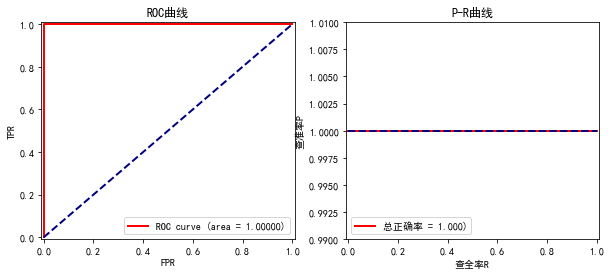

In [128]:
fpr,tpr,thresholds = roc_curve(Y_test,Y_pro,pos_label=1) ###计算fpr和tpr
roc_auc = auc(fpr,tpr) ###计算auc的值
print('AUC:',roc_auc)
print('总正确率',accuracy_score(Y_test,modelSVC.predict(X_test)))
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
axes[0].plot(fpr, tpr, color='r',linewidth=2, label='ROC curve (area = %0.5f)' % roc_auc) 
axes[0].plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')
axes[0].set_xlim([-0.01, 1.01])
axes[0].set_ylim([-0.01, 1.01])
axes[0].set_xlabel('FPR')
axes[0].set_ylabel('TPR')
axes[0].set_title('ROC曲线')
axes[0].legend(loc="lower right")



pre, rec, thresholds = precision_recall_curve(Y_test,Y_pro,pos_label=1) #
axes[1].plot(rec, pre, color='r',linewidth=2, label='总正确率 = %0.3f)' % accuracy_score(Y_test,modelSVC.predict(X_test))) 
axes[1].plot([0,1],[1,pre.min()],color='navy', linewidth=2, linestyle='--')
axes[1].set_xlim([-0.01, 1.01])
axes[1].set_ylim([pre.min()-0.01, 1.01])
axes[1].set_xlabel('查全率R')
axes[1].set_ylabel('查准率P')
axes[1].set_title('P-R曲线')
axes[1].legend(loc='lower left')
plt.show()

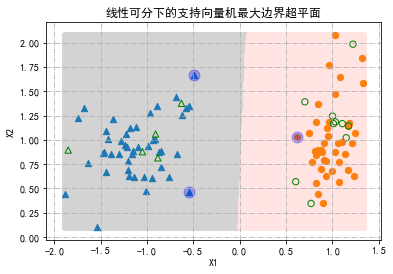

In [54]:
plt.figure(figsize=(6,4)) 
plt.scatter(X0[np.where(Y0==1),0],X0[np.where(Y0==1),1],c='lightgray')
plt.scatter(X0[np.where(Y0==0),0],X0[np.where(Y0==0),1],c='mistyrose')
for k,m in [(1,'^'),(0,'o')]:
    plt.scatter(X_train[Y_train==k,0],X_train[Y_train==k,1],marker=m,s=40)
    plt.scatter(X_test[Y_test==k,0],X_test[Y_test==k,1],marker=m,s=40,c='',edgecolors='g')
plt.scatter(modelSVC.support_vectors_[:,0],modelSVC.support_vectors_[:,1],marker='o',c='b',s=120,alpha=0.3)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("线性可分下的支持向量机最大边界超平面")
plt.grid(True,linestyle='-.')
plt.show()


## 线性不可分支持向量机

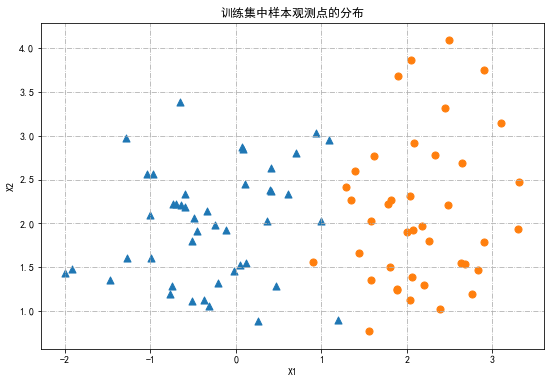

In [60]:
N=100
X,Y=make_classification(n_samples=N,n_features=2,n_redundant=0,n_informative=2,class_sep=1.2,random_state=1,n_clusters_per_class=1)
rng=np.random.RandomState(2)
X+=2*rng.uniform(size=X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.85, random_state=1)

plt.figure(figsize=(9,6))
markers=['^','o']
for k,m in zip([1,0],markers):
    plt.scatter(X_train[Y_train==k,0],X_train[Y_train==k,1],marker=m,s=50)
plt.title("训练集中样本观测点的分布")
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True,linestyle='-.')
plt.show()   

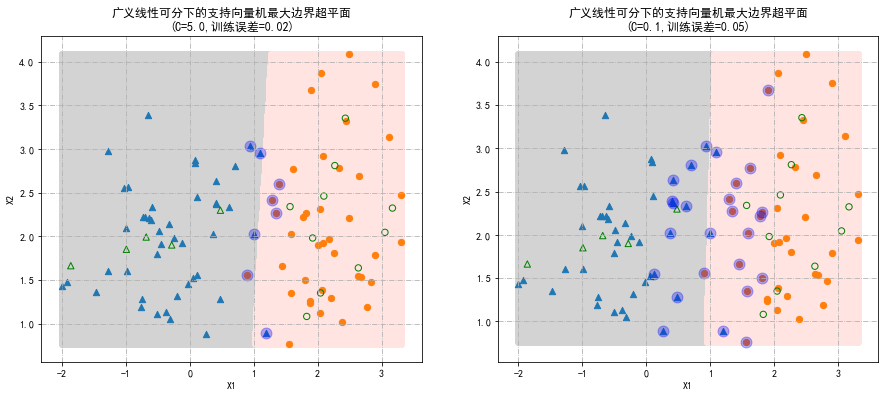

In [61]:
X1,X2= np.meshgrid(np.linspace(X_train[:,0].min(),X_train[:,0].max(),500),np.linspace(X_train[:,1].min(),X_train[:,1].max(),500))
X0=np.hstack((X1.reshape(len(X1)*len(X2),1),X2.reshape(len(X1)*len(X2),1)))

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,6))

for C,H in [(5,0),(0.1,1)]:
    modelSVC=svm.SVC(kernel='linear',random_state=123,C=C) 
    modelSVC.fit(X_train,Y_train)
    Y0=modelSVC.predict(X0)
    
    axes[H].scatter(X0[np.where(Y0==1),0],X0[np.where(Y0==1),1],c='lightgray')
    axes[H].scatter(X0[np.where(Y0==0),0],X0[np.where(Y0==0),1],c='mistyrose')
    for k,m in [(1,'^'),(0,'o')]:
        axes[H].scatter(X_train[Y_train==k,0],X_train[Y_train==k,1],marker=m,s=40)
        axes[H].scatter(X_test[Y_test==k,0],X_test[Y_test==k,1],marker=m,s=40,c='',edgecolors='g')
        
    axes[H].scatter(modelSVC.support_vectors_[:,0],modelSVC.support_vectors_[:,1],marker='o',c='b',s=120,alpha=0.3)
    axes[H].set_xlabel("X1")
    axes[H].set_ylabel("X2")
    axes[H].set_title("广义线性可分下的支持向量机最大边界超平面\n(C=%.1f,训练误差=%.2f)"%(C,1-modelSVC.score(X_train,Y_train)))
    axes[H].grid(True,linestyle='-.')

## 非线性可分支持向量机

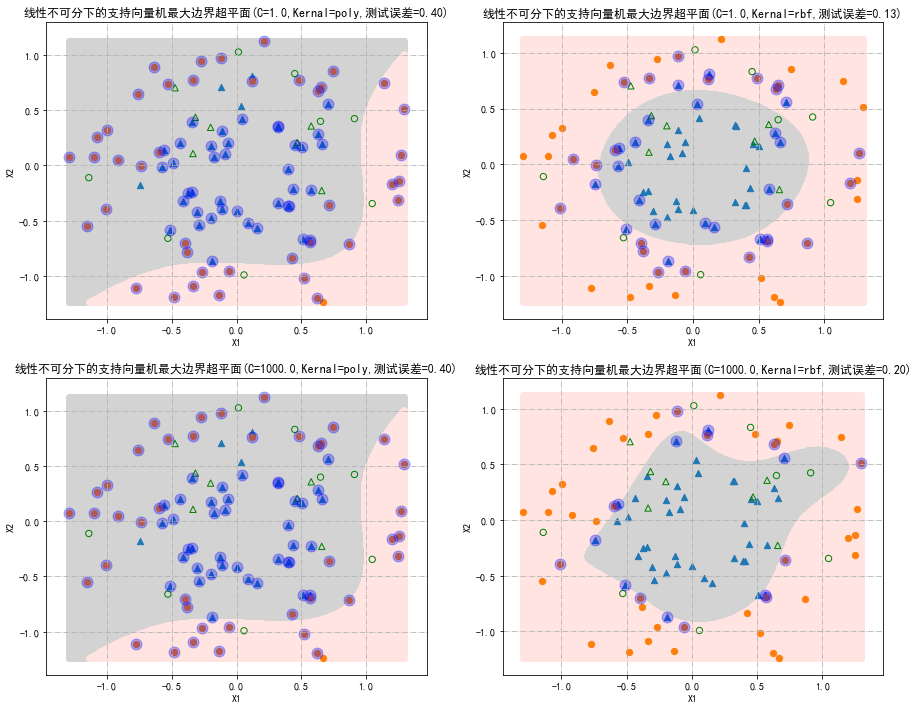

In [67]:
N=100
X,Y=make_circles(n_samples=N,noise=0.2,factor=0.5,random_state=123)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.85, random_state=1)
X1,X2= np.meshgrid(np.linspace(X_train[:,0].min(),X_train[:,0].max(),500),np.linspace(X_train[:,1].min(),X_train[:,1].max(),500))
X0=np.hstack((X1.reshape(len(X1)*len(X2),1),X2.reshape(len(X1)*len(X2),1)))
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,12))
for C,ker,H,L in [(1,'poly',0,0),(1,'rbf',0,1),(1000,'poly',1,0),(1000,'rbf',1,1)]:
    modelSVC=svm.SVC(kernel=ker,random_state=123,C=C) 
    modelSVC.fit(X_train,Y_train)
    Y0=modelSVC.predict(X0)
    axes[H,L].scatter(X0[np.where(Y0==1),0],X0[np.where(Y0==1),1],c='lightgray')
    axes[H,L].scatter(X0[np.where(Y0==0),0],X0[np.where(Y0==0),1],c='mistyrose')
    for k,m in [(1,'^'),(0,'o')]:
        axes[H,L].scatter(X_train[Y_train==k,0],X_train[Y_train==k,1],marker=m,s=40)
        axes[H,L].scatter(X_test[Y_test==k,0],X_test[Y_test==k,1],marker=m,s=40,c='',edgecolors='g')
        
    axes[H,L].scatter(modelSVC.support_vectors_[:,0],modelSVC.support_vectors_[:,1],marker='o',c='b',s=120,alpha=0.3)
    axes[H,L].set_xlabel("X1")
    axes[H,L].set_ylabel("X2")
    axes[H,L].set_title("线性不可分下的支持向量机最大边界超平面(C=%.1f,Kernal=%s,测试误差=%.2f)"%(C,ker,1-modelSVC.score(X_test,Y_test)))
    axes[H,L].grid(True,linestyle='-.')

## 支持向量回归


In [71]:
import time
t0=time.time()

1.342803955078125

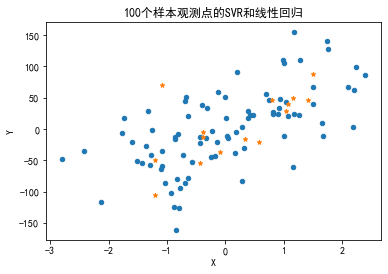

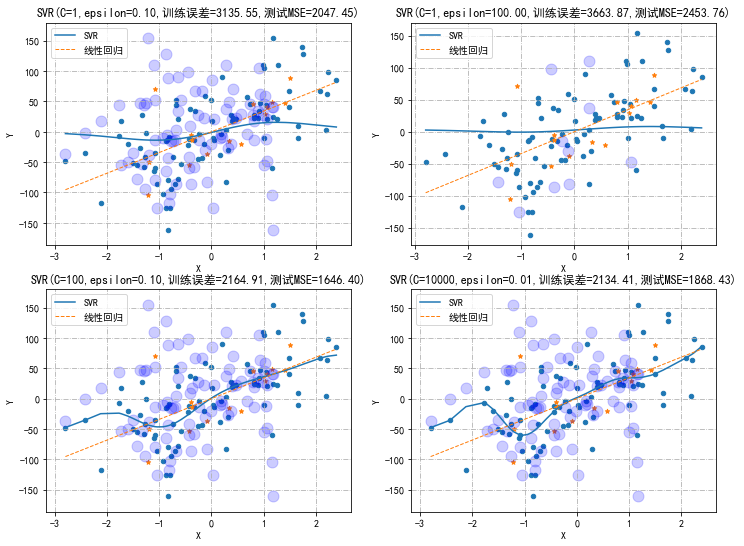

In [72]:
N=100
X,Y=make_regression(n_samples=N,n_features=1,random_state=123,noise=50,bias=0)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.85, random_state=123)
plt.scatter(X_train,Y_train,s=20)
plt.scatter(X_test,Y_test,s=20,marker='*')
plt.title("100个样本观测点的SVR和线性回归")
plt.xlabel("X")
plt.ylabel("Y")
        
modelLM=LM.LinearRegression()
modelLM.fit(X_train,Y_train)
X[:,0].sort()
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,9))
for C,E,H,L in [(1,0.1,0,0),(1,100,0,1),(100,0.1,1,0),(10000,0.01,1,1)]:
    modelSVR=svm.SVR(C=C,epsilon=E)
    modelSVR.fit(X_train,Y_train)
    axes[H,L].scatter(X_train,Y_train,s=20)
    axes[H,L].scatter(X_test,Y_test,s=20,marker='*')    
    axes[H,L].scatter(X[modelSVR.support_],Y[modelSVR.support_],marker='o',c='b',s=120,alpha=0.2)
    axes[H,L].plot(X,modelSVR.predict(X),linestyle='-',label="SVR")
    axes[H,L].plot(X,modelLM.predict(X),linestyle='--',label="线性回归",linewidth=1)
    axes[H,L].legend()
    ytrain=modelSVR.predict(X_train)
    ytest=modelSVR.predict(X_test)
    axes[H,L].set_title("SVR(C=%d,epsilon=%.2f,训练误差=%.2f,测试MSE=%.2f)"%(C,E,mean_squared_error(Y_train,ytrain),
                                                                       mean_squared_error(Y_test,ytest)))
    axes[H,L].set_xlabel("X")
    axes[H,L].set_ylabel("Y")
    axes[H,L].grid(True,linestyle='-.')

t1=time.time()
t1-t0

# 神经网络

- https://scikit-learn.org/stable/modules/neural_networks_supervised.html

- 多层感知机+分类

MLPClassifier(hidden_layer_sizes=100, activation='relu', \*, solver='adam', alpha=0.0001, batch_size='auto',
              learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True,
              random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
              early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
              epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
              
- hidden_layer_sizes=100,hidden_layer_sizes元组，长度= n_layers-2，默认值=（100，）第i个元素代表第i个隐藏层中的神经元数量。

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.cm as cm
import warnings
warnings.filterwarnings(action = 'ignore')
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False


from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss,r2_score,mean_squared_error
import sklearn.neural_network as net

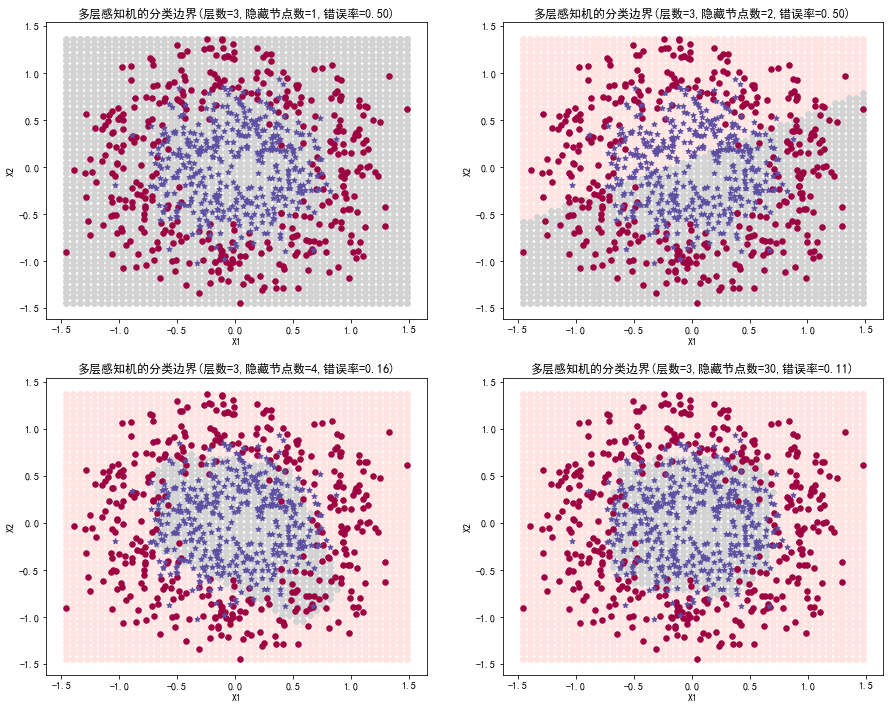

In [129]:
N=800
X,Y=make_circles(n_samples=N,noise=0.2,factor=0.5,random_state=123)
unique_lables=set(Y)
X1,X2= np.meshgrid(np.linspace(X[:,0].min(),X[:,0].max(),50),np.linspace(X[:,1].min(),X[:,1].max(),50))
X0=np.hstack((X1.reshape(len(X1)*len(X2),1),X2.reshape(len(X1)*len(X2),1)))

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,12))
colors=plt.cm.Spectral(np.linspace(0,1,len(unique_lables)))
markers=['o','*']
for hn,H,L in [(1,0,0),(2,0,1),(4,1,0),(30,1,1)]:
    NeuNet=net.MLPClassifier(hidden_layer_sizes=(hn,),random_state=123)
    NeuNet.fit(X,Y)
    Y0=NeuNet.predict(X0)
    axes[H,L].scatter(X0[np.where(Y0==0),0],X0[np.where(Y0==0),1],c='mistyrose')
    axes[H,L].scatter(X0[np.where(Y0==1),0],X0[np.where(Y0==1),1],c='lightgray')
    axes[H,L].set_xlabel('X1')
    axes[H,L].set_ylabel('X2')
    axes[H,L].set_title('多层感知机的分类边界(层数=%d,隐藏节点数=%d,错误率=%.2f)'%(NeuNet.n_layers_,hn,1-NeuNet.score(X,Y)))
    for k,col,m in zip(unique_lables,colors,markers):
        axes[H,L].scatter(X[Y==k,0],X[Y==k,1],color=col,s=30,marker=m) 

MLPRegressor(hidden_layer_sizes=100, activation='relu', \*, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor

# 第三次作业

1. 分析研究数据：北京市空气质量数据.xlsx 并进行分类
2. 做sklearn 模块的思维导图